In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsbombpy import sb

from scout_report import ScoutReport

In [2]:
events_df = sb.competition_events(
country="Germany",
division="1. Bundesliga",
season="2023/2024",
gender="male")

frames_df = sb.competition_frames(
country="Germany",
division="1. Bundesliga",
season="2023/2024",
gender="male")

frames_df.rename(columns={'event_uuid': 'id'}, inplace = True)
df=pd.merge(frames_df, events_df,
how="left", on=["match_id","id"])

In [3]:
report = ScoutReport(df)

In [4]:
match_id = 3895302 # Bayer Leverkusen vs Werder Bremen
team_name = 'Bayer Leverkusen'
player_name = 'Florian Wirtz'

In [20]:
report.filter_match(match_id, team_name)

,actor,id,keeper,location_x,match_id,teammate,visible_area,50_50,bad_behaviour_card,ball_receipt_outcome,...,tactics,team,team_id,timestamp,type,under_pressure,x,y,end_x,end_y
85,False,cfa1f5e1-4e8e-4fc2-bbc8-4df5fdef8283,False,"[65.15062260355599, -1.9999714507543906]",3895302,False,"[62.93333229134909, 51.86733377543315, 63.4877...",NaN,NaN,NaN,...,NaN,Bayer Leverkusen,904,00:00:09.637,Pressure,NaN,65.150623,-1.999971,NaN,NaN
86,False,cfa1f5e1-4e8e-4fc2-bbc8-4df5fdef8283,False,"[72.20409209473715, 24.670528964829828]",3895302,True,"[62.93333229134909, 51.86733377543315, 63.4877...",NaN,NaN,NaN,...,NaN,Bayer Leverkusen,904,00:00:09.637,Pressure,NaN,72.204092,24.670529,NaN,NaN
87,False,cfa1f5e1-4e8e-4fc2-bbc8-4df5fdef8283,False,"[72.22263876636367, 41.44817533323199]",3895302,True,"[62.93333229134909, 51.86733377543315, 63.4877...",NaN,NaN,NaN,...,NaN,Bayer Leverkusen,904,00:00:09.637,Pressure,NaN,72.222639,41.448175,NaN,NaN
88,False,cfa1f5e1-4e8e-4fc2-bbc8-4df5fdef8283,False,"[75.08686399118173, 23.893590295486607]",3895302,False,"[62.93333229134909, 51.86733377543315, 63.4877...",NaN,NaN,NaN,...,NaN,Bayer Leverkusen,904,00:00:09.637,Pressure,NaN,75.086864,23.893590,NaN,NaN
89,False,cfa1f5e1-4e8e-4fc2-bbc8-4df5fdef8283,False,"[77.19475266070658, 33.35809135000714]",3895302,False,"[62.93333229134909, 51.86733377543315, 63.4877...",NaN,NaN,NaN,...,NaN,Bayer Leverkusen,904,00:00:09.637,Pressure,NaN,77.194753,33.358091,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56304,False,dcc0c591-7ebd-4e42-8206-04bfefa94f33,False,"[102.68101772808643, 33.70531831130036]",3895302,True,"[107.44543913198896, 80.0, 81.22861686199415, ...",NaN,NaN,NaN,...,NaN,Bayer Leverkusen,904,00:44:25.079,Shot,NaN,102.681018,33.705318,NaN,NaN
56305,False,dcc0c591-7ebd-4e42-8206-04bfefa94f33,False,"[105.37557123236053, 44.57694494060153]",3895302,False,"[107.44543913198896, 80.0, 81.22861686199415, ...",NaN,NaN,NaN,...,NaN,Bayer Leverkusen,904,00:44:25.079,Shot,NaN,105.375571,44.576945,NaN,NaN
56306,False,dcc0c591-7ebd-4e42-8206-04bfefa94f33,False,"[105.5911437445084, 47.30259463012283]",3895302,False,"[107.44543913198896, 80.0, 81.22861686199415, ...",NaN,NaN,NaN,...,NaN,Bayer Leverkusen,904,00:44:25.079,Shot,NaN,105.591144,47.302595,NaN,NaN
56307,True,dcc0c591-7ebd-4e42-8206-04bfefa94f33,False,"[106.4000015258789, 48.79999923706055]",3895302,True,"[107.44543913198896, 80.0, 81.22861686199415, ...",NaN,NaN,NaN,...,NaN,Bayer Leverkusen,904,00:44:25.079,Shot,NaN,106.400002,48.799999,NaN,NaN


In [21]:
stats = report.calculate_summary_stats()
print("\n=== Estatísticas da Partida ===")
for k, v in stats.items():
    print(f"{k}: {v}")


=== Estatísticas da Partida ===
Total de passses: 8948
Passes completos: 8076
% Acurácia: 90.25
Passes sob pressão: 1093
Passes progressivos (>15m de distância): 1016
Passes no terço final: 2521


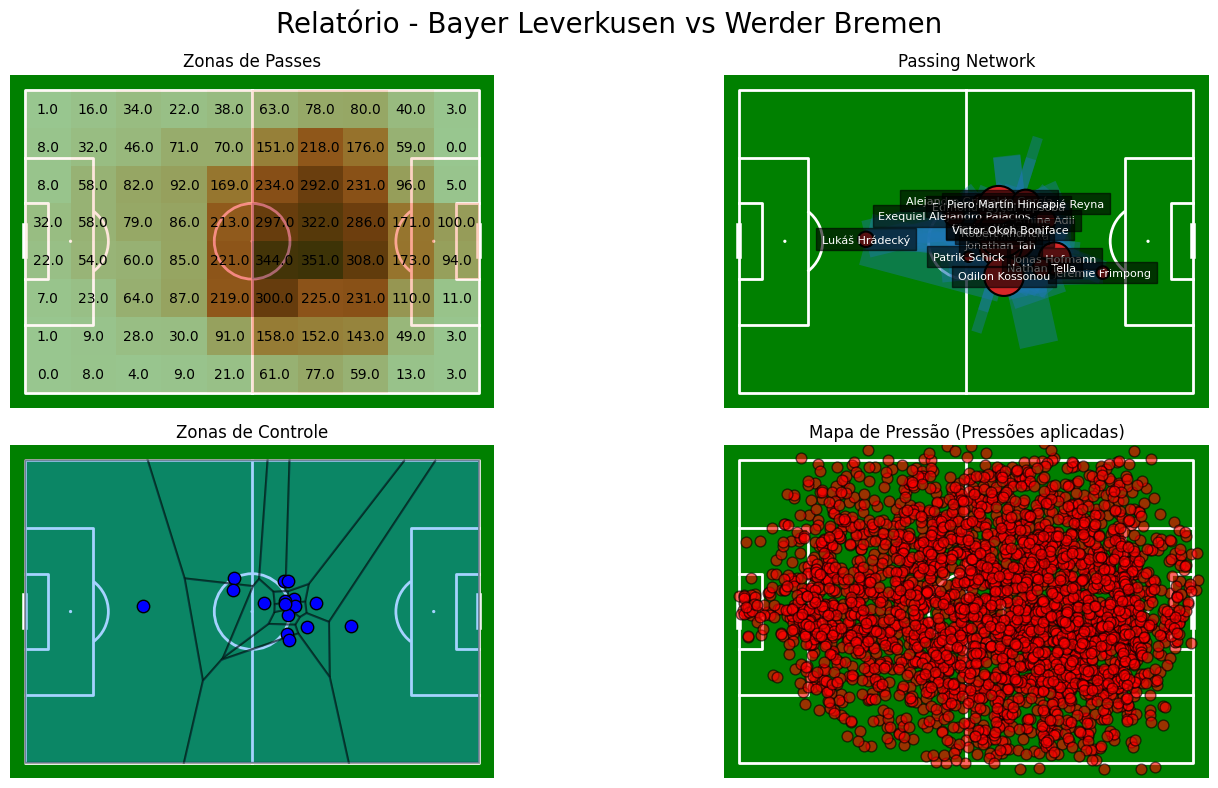

In [22]:
# Layout dos gráficos
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

# # Gráfico 1 - Mapa de passes
# report.plot_pass_map(axs[0, 0])

# Gráfico 2 - Heatmap de zonas
report.plot_heatmap(axs[0, 0])

# Gráfico 3 - Passing Network
report.plot_passing_network(axs[0, 1])

# Gráfico 4 - Zones of Control
report.plot_zones_of_control(axs[1, 0])

# Gráfico 5 - Pressure Map
report.plot_pressure_map(axs[1, 1])

# # Gráfico 6 - Espaco Vazio
# axs[2,1].axis('off')

plt.suptitle(f"Relatório - {team_name} vs Werder Bremen", fontsize=20)
plt.tight_layout()
plt.show()